In [52]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
ql.Settings.instance().evaluationDate = ql.Date(31,3,2020)

In [33]:
# flat fwd @ 3%

#flat_fwd = ql.FlatForward(ql.Date(31,3,2020), ql.QuoteHandle(ql.SimpleQuote(0.03)), ql.Actual365Fixed())
flat_fwd = ql.FlatForward(0, ql.TARGET(),ql.QuoteHandle(ql.SimpleQuote(0.03)), ql.Actual365Fixed())
ytsh = ql.YieldTermStructureHandle(flat_fwd)

# Fixed Bond

In [34]:
issueDate = ql.Date(31, 3, 2020)
maturityDate = ql.Date(31, 3, 2030)
tenor = ql.Period(ql.Annual)
calendar = ql.TARGET()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Forward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

In [35]:
list(schedule)

[Date(31,3,2020),
 Date(31,3,2021),
 Date(31,3,2022),
 Date(31,3,2023),
 Date(31,3,2024),
 Date(31,3,2025),
 Date(31,3,2026),
 Date(31,3,2027),
 Date(31,3,2028),
 Date(31,3,2029),
 Date(31,3,2030)]

In [36]:
dayCount = ql.Thirty360()
couponRate = .06
coupons = [couponRate]
settlementDays = 0
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
bondEngine = ql.DiscountingBondEngine(ytsh)
fixedRateBond.setPricingEngine(bondEngine)

In [37]:
fixedRateBond.NPV()

125.11995412961713

In [38]:
ql.Settings.instance().evaluationDate = ql.Date(31,3,2021)

In [39]:
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
bondEngine = ql.DiscountingBondEngine(ytsh)
fixedRateBond.setPricingEngine(bondEngine)

In [40]:
fixedRateBond.NPV()

122.93042402092

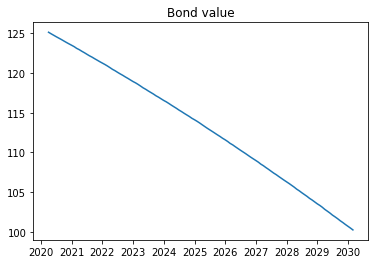

In [77]:
f, ax = plt.subplots()
ys = []
xs = [issueDate + ql.Period(i, ql.Months) for i in range(0,12*10)]
xs_plot = [x.to_date() for x in xs]
for x in xs:
    ql.Settings.instance().evaluationDate = x
    #ys.append(fixedRateBond.NPV())
    ys.append(fixedRateBond.cleanPrice())
ax.set_title('Bond value')
ax.plot(xs_plot, ys);

# Amortizing Bond

In [92]:
notionals = range(100,0,-10)
amortizing_bond = ql.AmortizingFixedRateBond(settlementDays, notionals, schedule, coupons, dayCount)
amortizing_bond.setPricingEngine(bondEngine)

In [93]:
for cf in amortizing_bond.cashflows():
    print(cf.date(), cf.amount())

March 31st, 2021 6.000000000000005
March 31st, 2021 10.0
March 31st, 2022 5.400000000000005
March 31st, 2022 10.0
March 31st, 2023 4.800000000000004
March 31st, 2023 10.0
April 2nd, 2024 4.200000000000004
April 2nd, 2024 10.0
March 31st, 2025 3.600000000000003
March 31st, 2025 10.0
March 31st, 2026 3.0000000000000027
March 31st, 2026 10.0
March 31st, 2027 2.400000000000002
March 31st, 2027 10.0
March 31st, 2028 1.8000000000000016
March 31st, 2028 10.0
April 3rd, 2029 1.200000000000001
April 3rd, 2029 10.0
April 1st, 2030 0.6000000000000005
April 1st, 2030 10.0


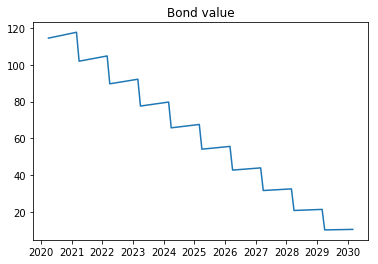

In [99]:
f, ax = plt.subplots()
ys = []
xs = [issueDate + ql.Period(i, ql.Months) for i in range(0,12*10)]
xs_plot = [x.to_date() for x in xs]
for x in xs:
    ql.Settings.instance().evaluationDate = x
    ys.append(amortizing_bond.NPV())
    #ys.append(amortizing_bond.cleanPrice())
ax.set_title('Bond value')
ax.plot(xs_plot, ys);